# LSTM - Weakly Supervised

## Import lib

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## LSTM model building 

In [2]:
# Load the training and testing data
train_data = pd.read_csv('preprocessed_autolabelled_dataset.csv')
test_data = pd.read_csv('preprocessed_test.csv')

# Split the data into input and target
train_text = train_data['text'].values
train_labels = train_data['label'].values
test_text = test_data['text'].values
test_labels = test_data['label'].values

# Create a tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_text)

# Convert the training and testing data into sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=max_length),
    tf.keras.layers.LSTM(64, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_split=0.4)


Epoch 1/15
492/492 [==============================] - 22s 40ms/step - loss: 0.3605 - accuracy: 0.8373 - val_loss: 0.3117 - val_accuracy: 0.8555
Epoch 2/15
492/492 [==============================] - 18s 37ms/step - loss: 0.2538 - accuracy: 0.8859 - val_loss: 0.3186 - val_accuracy: 0.8591
Epoch 3/15
492/492 [==============================] - 16s 32ms/step - loss: 0.2123 - accuracy: 0.9063 - val_loss: 0.3421 - val_accuracy: 0.8591
Epoch 4/15
492/492 [==============================] - 15s 30ms/step - loss: 0.1787 - accuracy: 0.9250 - val_loss: 0.3557 - val_accuracy: 0.8556
Epoch 5/15
492/492 [==============================] - 15s 31ms/step - loss: 0.1515 - accuracy: 0.9369 - val_loss: 0.3850 - val_accuracy: 0.8482
Epoch 6/15
492/492 [==============================] - 15s 30ms/step - loss: 0.1306 - accuracy: 0.9474 - val_loss: 0.4151 - val_accuracy: 0.8551
Epoch 7/15
492/492 [==============================] - 15s 31ms/step - loss: 0.1151 - accuracy: 0.9563 - val_loss: 0.4982 - val_accuracy:

## pyplot graph

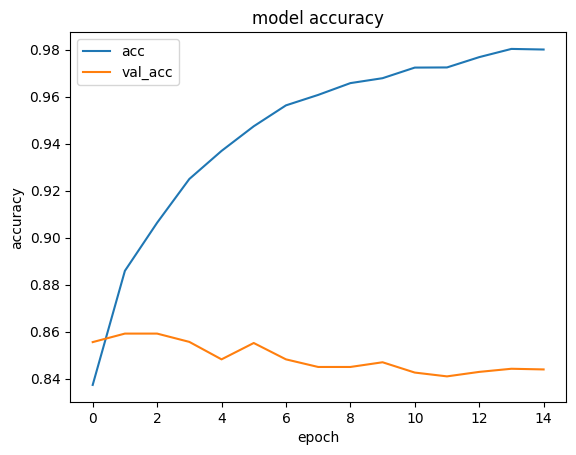

In [3]:
# plot learning rate (model accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

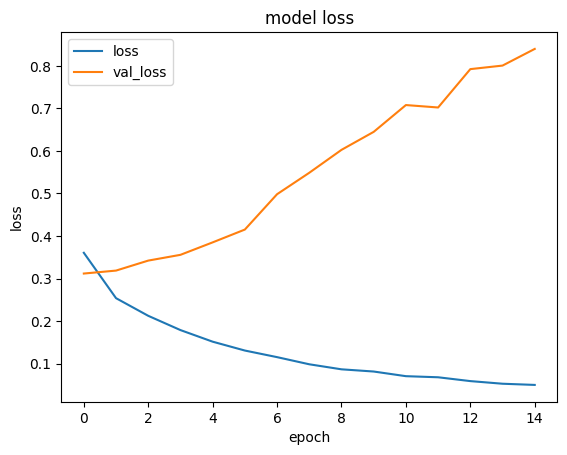

In [4]:
# plot learning rate (model loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

## Evaluation matrix

In [5]:
# Evaluate the model on the testing data
train_loss, train_acc = model.evaluate(train_data, train_labels)
print('Train accuracy:', train_acc)
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

820/820 [==============================] - 8s 9ms/step - loss: 0.3607 - accuracy: 0.9288
Train accuracy: 0.9287703633308411
57/57 [==============================] - 1s 9ms/step - loss: 1.1475 - accuracy: 0.8075
Test accuracy: 0.8075429797172546


In [6]:
# Generate predictions on the testing data
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)

# Generate and print the classification report
print(classification_report(test_labels, y_pred))

57/57 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       883
           1       0.86      0.74      0.80       920

    accuracy                           0.81      1803
   macro avg       0.81      0.81      0.81      1803
weighted avg       0.81      0.81      0.81      1803



In [7]:
# Generate and print the confusion matrix
conm = confusion_matrix(test_labels, y_pred)

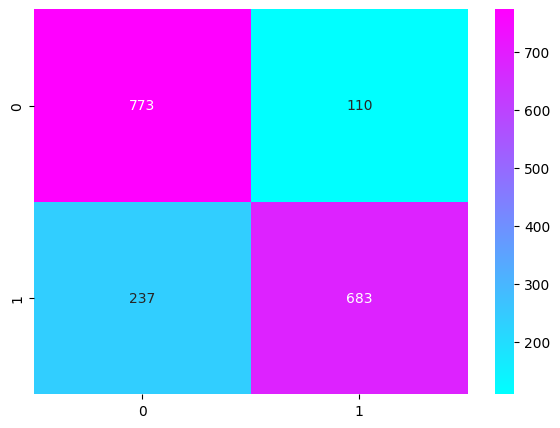

In [8]:
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='cool')
plt.show()